In [2]:
#use "topfind"
#require "owl-jupyter"
open Owl_jupyter
open Owl;;

Raised at Stdlib.invalid_arg in file "stdlib.ml", line 30, characters 20-45
Called from Toploop in file "toplevel/toploop.ml", line 516, characters 2-159
Called from Topdirs.load_compunit in file "toplevel/topdirs.ml", line 153, characters 11-23

- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


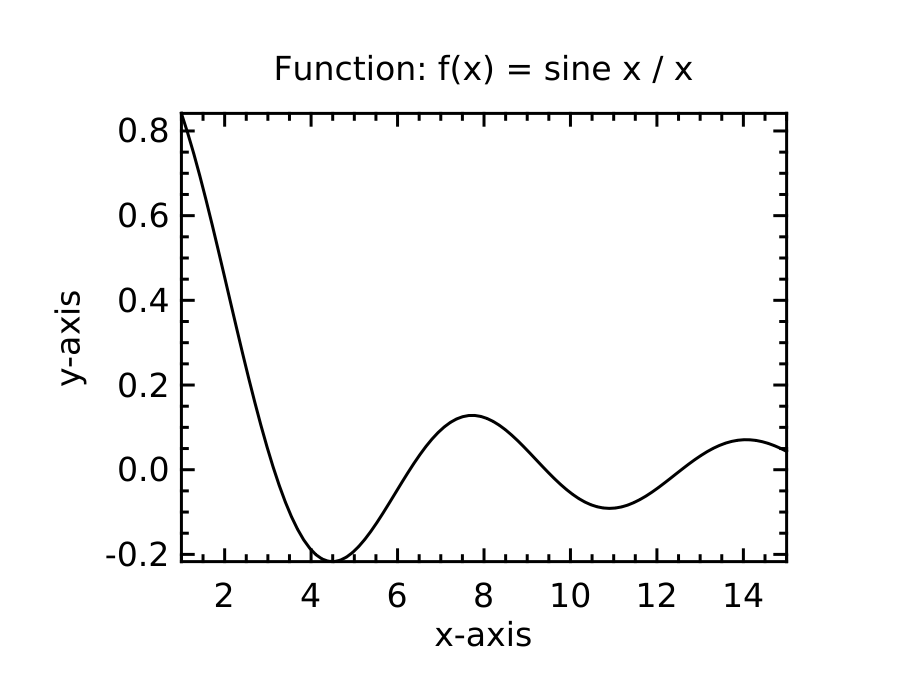

- : unit = ()


In [3]:
let f x = Maths.sin x /. x in
let h = Plot.create "plot_001.png" in

Plot.set_title h "Function: f(x) = sine x / x";
Plot.set_xlabel h "x-axis";
Plot.set_ylabel h "y-axis";
Plot.set_font_size h 8.;
Plot.set_pen_size h 3.;
Plot.plot_fun ~h f 1. 15.;

Plot.output h

In [4]:
open Algodiff.D

let f x = Maths.(x ** (F 2.) - (F 2.))

let _ =
    let x = ref 1. in
    for _ = 0 to 6 do
        let g = diff f (F !x) |> unpack_elt in
        let v = f (F !x) |> unpack_elt in
        x := !x -. v /. g;
        Printf.printf "%.15f\n" !x
    done

val f : Owl_algodiff.D.t -> Owl_algodiff.D.t = <fun>


- : unit = ()


In [5]:
let f x = x *. x -. 2.;;

val f : float -> float = <fun>


In [6]:
Owl_maths_root.brent f 0. 2.;;

- : float = 1.41421331999550248


In [7]:
open Algodiff.D

let f x = Maths.(
    (F 1.) / ((x - F 0.3) ** (F 2.) + F 0.01) +
    (F 1.) / ((x - F 0.9) ** (F 2.) + F 0.04) - F 6.)

let g = diff f

let f' x = f (F x) |> unpack_flt

let g' x = g (F x) |> unpack_flt

val f : Owl_algodiff.D.t -> Owl_algodiff.D.t = <fun>


val g : Owl.Algodiff.D.t -> Owl.Algodiff.D.t = <fun>


val f' : Owl.Algodiff.D.A.elt -> float = <fun>


val g' : Owl.Algodiff.D.A.elt -> float = <fun>


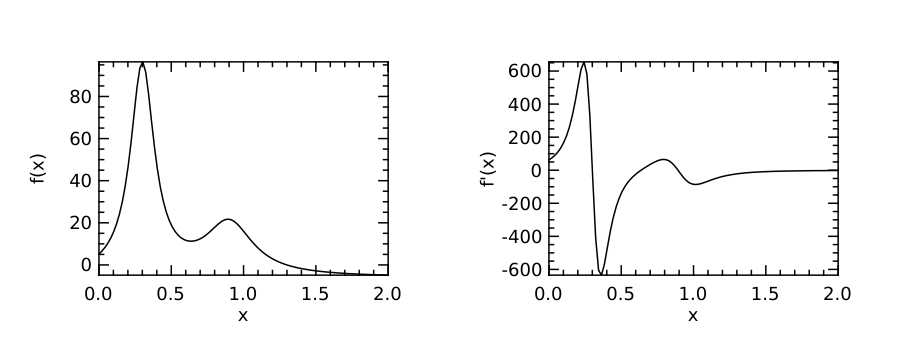

- : unit = ()


In [8]:
let _ =
  let h = Plot.create ~m:1 ~n:2 "plot_hump.png" in
  Plot.set_pen_size h 1.5;
  Plot.subplot h 0 0;
  Plot.plot_fun ~h f' 0. 2.;
  Plot.set_ylabel h "f(x)";
  Plot.subplot h 0 1;
  Plot.plot_fun ~h g' 0. 2.;
  Plot.set_ylabel h "f'(x)";
  Plot.output h